In [101]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV

import random

In [6]:
stock = ss.StockDataFrame.retype(pd.read_csv('../Data/AMZN.csv'))


In [7]:
stock.head()

,open,high,low,close,volume
date,,,,,
2017-04-24,908.68,909.990,903.8200,907.41,3122893
2017-04-25,907.04,909.480,903.0000,907.62,3380639
2017-04-26,910.30,915.749,907.5600,909.29,2608948
2017-04-27,914.39,921.860,912.1100,918.38,5305543
2017-04-28,948.83,949.590,924.3335,924.99,7364681


In [8]:
stock['macd']

date
2017-04-24     0.000000
2017-04-25     0.004712
2017-04-26     0.057790
2017-04-27     0.408706
2017-04-28     0.853811
2017-05-01     2.099087
2017-05-02     2.803099
2017-05-03     2.949013
2017-05-04     2.831536
2017-05-05     2.532905
2017-05-08     3.074860
2017-05-09     3.638001
2017-05-10     3.788773
2017-05-11     3.775337
2017-05-12     4.531796
2017-05-15     4.843836
2017-05-16     5.522963
2017-05-17     4.631672
2017-05-18     4.771133
2017-05-19     4.909046
2017-05-22     5.673270
2017-05-23     6.255697
2017-05-24     7.231769
2017-05-25     8.800276
2017-05-26    10.083341
2017-05-30    11.028572
2017-05-31    11.488735
2017-06-01    11.808733
2017-06-02    12.698172
2017-06-05    13.579968
                ...    
2018-03-09    49.277879
2018-03-12    51.796255
2018-03-13    52.364598
2018-03-14    52.438090
2018-03-15    51.205663
2018-03-16    48.807771
2018-03-19    44.238964
2018-03-20    43.472189
2018-03-21    42.005090
2018-03-22    37.430182
2018-03-23 

In [9]:
stock.head()

,open,high,low,close,volume,close_12_ema,close_26_ema,macd,macds,macdh
date,,,,,,,,,,
2017-04-24,908.68,909.990,903.8200,907.41,3122893,907.410000,907.410000,0.000000,0.000000,0.000000
2017-04-25,907.04,909.480,903.0000,907.62,3380639,907.523750,907.519038,0.004712,0.002618,0.004188
2017-04-26,910.30,915.749,907.5600,909.29,2608948,908.213118,908.155328,0.057790,0.025229,0.065122
2017-04-27,914.39,921.860,912.1100,918.38,5305543,911.422405,911.013699,0.408706,0.155133,0.507145
2017-04-28,948.83,949.590,924.3335,924.99,7364681,915.108672,914.254861,0.853811,0.362974,0.981674


In [11]:
stock['volume_delta']

date
2017-04-24          NaN
2017-04-25     257746.0
2017-04-26    -771691.0
2017-04-27    2696595.0
2017-04-28    2059138.0
2017-05-01   -1898137.0
2017-05-02   -1617709.0
2017-05-03    -266149.0
2017-05-04   -1164305.0
2017-05-05     448016.0
2017-05-08     549334.0
2017-05-09    -153618.0
2017-05-10   -1165601.0
2017-05-11      97558.0
2017-05-12    1431787.0
2017-05-15     644768.0
2017-05-16   -1144574.0
2017-05-17    2019527.0
2017-05-18   -1206231.0
2017-05-19      32742.0
2017-05-22   -1329872.0
2017-05-23    -226623.0
2017-05-24      47458.0
2017-05-25    2358980.0
2017-05-26   -1352878.0
2017-05-30    -206085.0
2017-05-31     650046.0
2017-06-01   -1458274.0
2017-06-02    1297487.0
2017-06-05   -1032469.0
                ...    
2018-03-09     671635.0
2018-03-12     639961.0
2018-03-13    1357681.0
2018-03-14   -2272449.0
2018-03-15    -189742.0
2018-03-16    1355311.0
2018-03-19    1155754.0
2018-03-20   -1999198.0
2018-03-21     169203.0
2018-03-22    1569780.0
2018-03-23 

In [12]:
stock.head()

,open,high,low,close,volume,close_12_ema,close_26_ema,macd,macds,macdh,volume_delta
date,,,,,,,,,,,
2017-04-24,908.68,909.990,903.8200,907.41,3122893,907.410000,907.410000,0.000000,0.000000,0.000000,NaN
2017-04-25,907.04,909.480,903.0000,907.62,3380639,907.523750,907.519038,0.004712,0.002618,0.004188,257746.0
2017-04-26,910.30,915.749,907.5600,909.29,2608948,908.213118,908.155328,0.057790,0.025229,0.065122,-771691.0
2017-04-27,914.39,921.860,912.1100,918.38,5305543,911.422405,911.013699,0.408706,0.155133,0.507145,2696595.0
2017-04-28,948.83,949.590,924.3335,924.99,7364681,915.108672,914.254861,0.853811,0.362974,0.981674,2059138.0


In [16]:
stock['open_-1_r'] #percentage change % from 1 day ago, change # to change days

date
2017-04-24         NaN
2017-04-25   -0.180482
2017-04-26    0.359411
2017-04-27    0.449302
2017-04-28    3.766445
2017-05-01   -2.216414
2017-05-02    2.031149
2017-05-03   -0.068135
2017-05-04   -0.132135
2017-05-05   -0.447737
2017-05-08    0.045719
2017-05-09    1.259366
2017-05-10    0.073468
2017-05-11   -0.879916
2017-05-12    0.993535
2017-05-15    0.443164
2017-05-16    0.236772
2017-05-17   -0.655567
2017-05-18   -1.036975
2017-05-19    1.909399
2017-05-22    0.120477
2017-05-23    1.143154
2017-05-24    0.100511
2017-05-25    0.906762
2017-05-26    1.030614
2017-05-30    0.151759
2017-05-31    0.350222
2017-06-01   -0.141000
2017-06-02    0.040056
2017-06-05    0.824833
                ...   
2018-03-09    0.870968
2018-03-12    1.861209
2018-03-13    1.466784
2018-03-14   -1.173296
2018-03-15   -0.125235
2018-03-16   -0.724138
2018-03-19   -1.826392
2018-03-20   -0.269535
2018-03-21    2.329167
2018-03-22   -1.322449
2018-03-23   -1.690227
2018-03-26   -0.585441
2018-0

In [17]:
stock.head()

,open,high,low,close,volume,close_12_ema,close_26_ema,macd,macds,macdh,volume_delta,open_-2_r,open_-1_r,open_-5_r
date,,,,,,,,,,,,,,
2017-04-24,908.68,909.990,903.8200,907.41,3122893,907.410000,907.410000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2017-04-25,907.04,909.480,903.0000,907.62,3380639,907.523750,907.519038,0.004712,0.002618,0.004188,257746.0,NaN,-0.180482,NaN
2017-04-26,910.30,915.749,907.5600,909.29,2608948,908.213118,908.155328,0.057790,0.025229,0.065122,-771691.0,0.178281,0.359411,NaN
2017-04-27,914.39,921.860,912.1100,918.38,5305543,911.422405,911.013699,0.408706,0.155133,0.507145,2696595.0,0.810328,0.449302,NaN
2017-04-28,948.83,949.590,924.3335,924.99,7364681,915.108672,914.254861,0.853811,0.362974,0.981674,2059138.0,4.232671,3.766445,NaN


In [18]:
stock['open_2_d']

C:\Python35\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


date
2017-04-24     -1.620
2017-04-25     -7.350
2017-04-26    -38.530
2017-04-27    -13.410
2017-04-28      2.185
2017-05-01    -18.200
2017-05-02      1.895
2017-05-03      5.480
2017-05-04      3.800
2017-05-05    -12.280
2017-05-08    -12.550
2017-05-09      7.690
2017-05-10     -1.000
2017-05-11    -13.620
2017-05-12     -6.500
2017-05-15      4.030
2017-05-16     16.200
2017-05-17     -8.140
2017-05-18    -19.200
2017-05-19    -12.180
2017-05-22    -12.000
2017-05-23     -9.830
2017-05-24    -19.000
2017-05-25    -11.660
2017-05-26     -5.000
2017-05-30     -2.080
2017-05-31      1.010
2017-06-01     -8.640
2017-06-02    -13.010
2017-06-05      1.280
               ...   
2018-03-09    -52.460
2018-03-12     -4.400
2018-03-13     20.960
2018-03-14     13.550
2018-03-15     40.470
2018-03-16     33.110
2018-03-19    -31.920
2018-03-20    -15.130
2018-03-21     47.440
2018-03-22     35.470
2018-03-23    -33.390
2018-03-26     83.000
2018-03-27    166.400
2018-03-28     29.380
2018-

In [19]:
stock.head()

,open,high,low,close,volume,close_12_ema,close_26_ema,macd,macds,macdh,volume_delta,open_-2_r,open_-1_r,open_-5_r,open_2_s,open_2_d
date,,,,,,,,,,,,,,,,
2017-04-24,908.68,909.990,903.8200,907.41,3122893,907.410000,907.410000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,910.300,-1.620
2017-04-25,907.04,909.480,903.0000,907.62,3380639,907.523750,907.519038,0.004712,0.002618,0.004188,257746.0,NaN,-0.180482,NaN,914.390,-7.350
2017-04-26,910.30,915.749,907.5600,909.29,2608948,908.213118,908.155328,0.057790,0.025229,0.065122,-771691.0,0.178281,0.359411,NaN,948.830,-38.530
2017-04-27,914.39,921.860,912.1100,918.38,5305543,911.422405,911.013699,0.408706,0.155133,0.507145,2696595.0,0.810328,0.449302,NaN,927.800,-13.410
2017-04-28,948.83,949.590,924.3335,924.99,7364681,915.108672,914.254861,0.853811,0.362974,0.981674,2059138.0,4.232671,3.766445,NaN,946.645,2.185


In [20]:
# CR indicator, including 5, 10, 20 days moving average
stock['cr']
stock['cr-ma1']
stock['cr-ma2']
stock['cr-ma3']

C:\Python35\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


date
2017-04-24           NaN
2017-04-25           NaN
2017-04-26           NaN
2017-04-27           NaN
2017-04-28           NaN
2017-05-01           NaN
2017-05-02           NaN
2017-05-03           NaN
2017-05-04           NaN
2017-05-05           NaN
2017-05-08     59.083470
2017-05-09    170.159574
2017-05-10    297.149482
2017-05-11    557.903028
2017-05-12    610.783814
2017-05-15    630.788601
2017-05-16    595.436542
2017-05-17    559.258335
2017-05-18    523.753249
2017-05-19    499.131416
2017-05-22    481.970160
2017-05-23    462.788371
2017-05-24    443.676030
2017-05-25    429.483471
2017-05-26    417.002207
2017-05-30    407.297400
2017-05-31    394.483871
2017-06-01    383.329470
2017-06-02    374.209824
2017-06-05    366.516839
                 ...    
2018-03-09    195.941367
2018-03-12    187.384927
2018-03-13    179.530865
2018-03-14    167.500120
2018-03-15    160.695378
2018-03-16    151.585977
2018-03-19    148.359516
2018-03-20    145.137202
2018-03-21    140.93

In [21]:
stock.head()

,open,high,low,close,volume,close_12_ema,close_26_ema,macd,macds,macdh,...,open_-2_r,open_-1_r,open_-5_r,open_2_s,open_2_d,middle,cr,cr-ma1,cr-ma2,cr-ma3
date,,,,,,,,,,,,,,,,,,,,,
2017-04-24,908.68,909.990,903.8200,907.41,3122893,907.410000,907.410000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,910.300,-1.620,907.073333,NaN,NaN,NaN,NaN
2017-04-25,907.04,909.480,903.0000,907.62,3380639,907.523750,907.519038,0.004712,0.002618,0.004188,...,NaN,-0.180482,NaN,914.390,-7.350,906.700000,59.083470,NaN,NaN,NaN
2017-04-26,910.30,915.749,907.5600,909.29,2608948,908.213118,908.155328,0.057790,0.025229,0.065122,...,0.178281,0.359411,NaN,948.830,-38.530,910.866333,281.235679,NaN,NaN,NaN
2017-04-27,914.39,921.860,912.1100,918.38,5305543,911.422405,911.013699,0.408706,0.155133,0.507145,...,0.810328,0.449302,NaN,927.800,-13.410,917.450000,551.129296,NaN,NaN,NaN
2017-04-28,948.83,949.590,924.3335,924.99,7364681,915.108672,914.254861,0.853811,0.362974,0.981674,...,4.232671,3.766445,NaN,946.645,2.185,932.971167,1340.163666,59.08347,NaN,NaN


In [22]:
stock.tail()

,open,high,low,close,volume,close_12_ema,close_26_ema,macd,macds,macdh,...,open_-2_r,open_-1_r,open_-5_r,open_2_s,open_2_d,middle,cr,cr-ma1,cr-ma2,cr-ma3
date,,,,,,,,,,,,,,,,,,,,,
2018-04-16,1445.00,1447.00,1427.48,1441.50,2808624,1441.735053,1460.923187,-19.188133,-16.850487,-4.675292,...,0.382077,-0.285687,1.401374,1514.65,-69.65,1438.660000,72.005309,74.022968,80.994935,129.986742
2018-04-17,1462.30,1507.19,1457.02,1503.83,5114403,1451.288122,1464.101469,-12.813347,-16.043059,6.459425,...,0.908125,1.197232,2.116635,1543.22,-80.92,1489.346667,77.729481,74.379651,76.635723,126.915430
2018-04-18,1514.65,1533.80,1504.11,1527.84,5227509,1463.065334,1468.822842,-5.757508,-13.985949,16.456883,...,4.820069,3.579977,5.224949,1561.20,-46.55,1521.916667,79.354395,75.713076,72.609744,124.641469
2018-04-19,1543.22,1568.52,1539.06,1556.91,6523728,1477.502975,1475.347816,2.155158,-10.757728,25.825772,...,5.533748,1.886244,7.205280,NaN,NaN,1554.830000,85.313599,75.392331,71.675331,121.918083
2018-04-20,1561.20,1561.20,1516.09,1527.49,5541622,1485.193286,1479.210200,5.983086,-7.409565,26.785302,...,3.073317,1.165096,7.732862,NaN,NaN,1534.926667,80.393529,75.006817,71.619980,119.672596


In [23]:
stock_df = pd.DataFrame(stock)

In [24]:
stock_df

,open,high,low,close,volume,close_12_ema,close_26_ema,macd,macds,macdh,...,open_-2_r,open_-1_r,open_-5_r,open_2_s,open_2_d,middle,cr,cr-ma1,cr-ma2,cr-ma3
date,,,,,,,,,,,,,,,,,,,,,
2017-04-24,908.680,909.9900,903.8200,907.41,3122893,907.410000,907.410000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,910.300,-1.620,907.073333,NaN,NaN,NaN,NaN
2017-04-25,907.040,909.4800,903.0000,907.62,3380639,907.523750,907.519038,0.004712,0.002618,0.004188,...,NaN,-0.180482,NaN,914.390,-7.350,906.700000,59.083470,NaN,NaN,NaN
2017-04-26,910.300,915.7490,907.5600,909.29,2608948,908.213118,908.155328,0.057790,0.025229,0.065122,...,0.178281,0.359411,NaN,948.830,-38.530,910.866333,281.235679,NaN,NaN,NaN
2017-04-27,914.390,921.8600,912.1100,918.38,5305543,911.422405,911.013699,0.408706,0.155133,0.507145,...,0.810328,0.449302,NaN,927.800,-13.410,917.450000,551.129296,NaN,NaN,NaN
2017-04-28,948.830,949.5900,924.3335,924.99,7364681,915.108672,914.254861,0.853811,0.362974,0.981674,...,4.232671,3.766445,NaN,946.645,2.185,932.971167,1340.163666,59.083470,NaN,NaN
2017-05-01,927.800,954.4000,927.8000,948.23,5466544,923.158897,921.059810,2.099087,0.833557,2.531059,...,1.466551,-2.216414,2.104151,946.000,-18.200,943.476667,822.306957,170.159574,NaN,NaN
2017-05-02,946.645,950.1000,941.4130,946.94,3848835,928.465567,925.662468,2.803099,1.331996,2.942207,...,-0.230284,2.031149,4.366401,944.750,1.895,946.151000,730.812540,297.149482,59.083470,NaN
2017-05-03,946.000,946.0000,935.9000,941.03,3582686,931.087571,928.138558,2.949013,1.720595,2.456834,...,1.961630,-0.068135,3.921784,940.520,5.480,940.976667,383.324185,557.903028,170.159574,NaN
2017-05-04,944.750,945.0000,934.2150,937.53,2418381,932.362113,929.530576,2.831536,1.977228,1.708617,...,-0.200181,-0.132135,3.320246,940.950,3.800,938.915000,306.010887,610.783814,297.149482,NaN


In [25]:
type(stock)

stockstats.StockDataFrame

In [26]:
type(stock_df)

pandas.core.frame.DataFrame

In [27]:
stock["rsi_6"]

C:\Python35\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


date
2017-04-24           NaN
2017-04-25    100.000000
2017-04-26    100.000000
2017-04-27    100.000000
2017-04-28    100.000000
2017-05-01    100.000000
2017-05-02     95.891343
2017-05-03     78.222416
2017-05-04     69.165468
2017-05-05     60.982916
2017-05-08     75.995413
2017-05-09     78.513870
2017-05-10     69.549225
2017-05-11     66.421577
2017-05-12     78.435149
2017-05-15     70.937656
2017-05-16     77.203992
2017-05-17     45.935317
2017-05-18     58.827926
2017-05-19     59.954665
2017-05-22     68.304751
2017-05-23     68.929293
2017-05-24     74.931760
2017-05-25     81.332328
2017-05-26     82.329546
2017-05-30     82.753348
2017-05-31     77.697664
2017-06-01     78.696326
2017-06-02     85.159698
2017-06-05     87.158954
                 ...    
2018-03-09     85.219112
2018-03-12     88.212894
2018-03-13     78.254255
2018-03-14     79.038575
2018-03-15     69.746866
2018-03-16     59.464009
2018-03-19     41.157617
2018-03-20     62.621628
2018-03-21     59.69

In [30]:
stock["rsi_12"]

date
2017-04-24           NaN
2017-04-25    100.000000
2017-04-26    100.000000
2017-04-27    100.000000
2017-04-28    100.000000
2017-05-01    100.000000
2017-05-02     96.462287
2017-05-03     81.969235
2017-05-04     74.716711
2017-05-05     68.345991
2017-05-08     77.546644
2017-05-09     79.219403
2017-05-10     73.134129
2017-05-11     71.086896
2017-05-12     78.017023
2017-05-15     73.298804
2017-05-16     76.944063
2017-05-17     55.283126
2017-05-18     62.669646
2017-05-19     63.319558
2017-05-22     68.169334
2017-05-23     68.533928
2017-05-24     72.068253
2017-05-25     76.353602
2017-05-26     77.060769
2017-05-30     77.344106
2017-05-31     75.057543
2017-06-01     75.561516
2017-06-02     79.265847
2017-06-05     80.635212
                 ...    
2018-03-09     75.194963
2018-03-12     77.478767
2018-03-13     73.607774
2018-03-14     73.999190
2018-03-15     70.488904
2018-03-16     66.284196
2018-03-19     56.964713
2018-03-20     65.249666
2018-03-21     63.75

In [31]:
stock["wr_10"]

date
2017-04-24    41.815235
2017-04-25    33.905579
2017-04-26    50.662797
2017-04-27    18.451750
2017-04-28    52.801030
2017-05-01    12.003891
2017-05-02    14.513619
2017-05-03    26.011673
2017-05-04    32.821012
2017-05-05    39.396887
2017-05-08    10.428016
2017-05-09    10.073515
2017-05-10    19.528178
2017-05-11    30.605099
2017-05-12     4.115462
2017-05-15    15.768645
2017-05-16    10.035211
2017-05-17    63.631791
2017-05-18    29.099598
2017-05-19    33.128039
2017-05-22     2.319882
2017-05-23    10.631808
2017-05-24     1.615911
2017-05-25    10.240525
2017-05-26     5.867347
2017-05-30     7.883672
2017-05-31    11.527680
2017-06-01     9.301914
2017-06-02     3.589007
2017-06-05     3.716955
                ...    
2018-03-09     0.040345
2018-03-12     4.616817
2018-03-13    18.064357
2018-03-14    16.329293
2018-03-15    21.669846
2018-03-16    33.587227
2018-03-19    76.407450
2018-03-20    32.652846
2018-03-21    38.702679
2018-03-22    78.772101
2018-03-23 

In [32]:
stock["cci"]

date
2017-04-24           NaN
2017-04-25    -66.666667
2017-04-26    100.000000
2017-04-27    127.027130
2017-04-28    146.746636
2017-05-01    128.442954
2017-05-02    101.483048
2017-05-03     67.030129
2017-05-04     52.870271
2017-05-05     33.985642
2017-05-08     77.819740
2017-05-09    104.660703
2017-05-10     78.688350
2017-05-11     60.963560
2017-05-12    115.491460
2017-05-15    115.645776
2017-05-16    152.730162
2017-05-17     20.461761
2017-05-18     61.140322
2017-05-19    110.483403
2017-05-22    128.887103
2017-05-23    129.228636
2017-05-24    147.553653
2017-05-25    201.480995
2017-05-26    172.278621
2017-05-30    148.701385
2017-05-31    100.495028
2017-06-01     95.720535
2017-06-02    110.560508
2017-06-05    112.705904
                 ...    
2018-03-09    174.785901
2018-03-12    189.379147
2018-03-13    143.411625
2018-03-14    121.891990
2018-03-15     83.863722
2018-03-16     55.786488
2018-03-19    -11.855600
2018-03-20     41.150425
2018-03-21     44.45

In [33]:
stock['tr']

date
2017-04-24         NaN
2017-04-25      6.4800
2017-04-26      8.1890
2017-04-27     12.5700
2017-04-28     31.2100
2017-05-01     29.4100
2017-05-02      8.6870
2017-05-03     11.0400
2017-05-04     10.7850
2017-05-05     10.4900
2017-05-08     14.9000
2017-05-09      8.8500
2017-05-10      8.7499
2017-05-11      9.5150
2017-05-12     15.1700
2017-05-15      7.0950
2017-05-16     12.0900
2017-05-17     21.9500
2017-05-18     17.9900
2017-05-19     10.4300
2017-05-22     11.5400
2017-05-23      8.3500
2017-05-24     10.7700
2017-05-25     18.6500
2017-05-26      9.4009
2017-05-30      5.6800
2017-05-31     17.9600
2017-06-01      7.6200
2017-06-02     12.8100
2017-06-05      9.7000
                ...   
2018-03-09     27.0800
2018-03-12     26.4400
2018-03-13     39.5300
2018-03-14     18.2600
2018-03-15     18.8000
2018-03-16     21.9400
2018-03-19     46.3300
2018-03-20     42.0700
2018-03-21     26.8300
2018-03-22     39.4600
2018-03-23     53.6600
2018-03-26     61.4300
2018-0

In [34]:
stock['atr']

date
2017-04-24          NaN
2017-04-25     6.480000
2017-04-26     7.366148
2017-04-27     9.230782
2017-04-28    15.350617
2017-05-01    18.593889
2017-05-02    16.622486
2017-05-03    15.637287
2017-05-04    14.862360
2017-05-05    14.220721
2017-05-08    14.313422
2017-05-09    13.613361
2017-05-10    13.023620
2017-05-11    12.618360
2017-05-12    12.900643
2017-05-15    12.282603
2017-05-16    12.262794
2017-05-17    13.228791
2017-05-18    13.690511
2017-05-19    13.382198
2017-05-22    13.211939
2017-05-23    12.771829
2017-05-24    12.594015
2017-05-25    13.122743
2017-05-26    12.802880
2017-05-30    12.199482
2017-05-31    12.681073
2017-06-01    12.263046
2017-06-02    12.307724
2017-06-05    12.096876
                ...    
2018-03-09    35.399701
2018-03-12    34.759722
2018-03-13    35.100456
2018-03-14    33.897566
2018-03-15    32.819169
2018-03-16    32.042085
2018-03-19    33.062651
2018-03-20    33.706033
2018-03-21    33.214888
2018-03-22    33.660967
2018-03-23 

In [37]:
# DMA, difference of 10 and 50 moving average
stock['dma']

# DMI
# +DI, default to 14 days
stock['pdi']
# -DI, default to 14 days
stock['mdi']
# DX, default to 14 days of +DI and -DI
stock['dx']
# ADX, 6 days SMA of DX, same as stock['dx_6_ema']
stock['adx']
# ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
stock['adxr']

# TRIX, default to 12 days
stock['trix']
# MATRIX is the simple moving average of TRIX
stock['trix_9_sma']

# VR, default to 26 days
stock['vr']

C:\Python35\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


date
2017-04-24           NaN
2017-04-25           inf
2017-04-26           inf
2017-04-27           inf
2017-04-28           inf
2017-05-01           inf
2017-05-02    626.848254
2017-05-03    324.648951
2017-05-04    244.940051
2017-05-05    189.727805
2017-05-08    216.588852
2017-05-09    242.241858
2017-05-10    207.956471
2017-05-11    181.127856
2017-05-12    202.447797
2017-05-15    161.814340
2017-05-16    176.506152
2017-05-17    142.133700
2017-05-18    157.042433
2017-05-19    172.075080
2017-05-22    182.074734
2017-05-23    191.216718
2017-05-24    200.538310
2017-05-25    218.787625
2017-05-26    231.916880
2017-05-30    244.266192
2017-05-31    212.757904
2017-06-01    209.706111
2017-06-02    213.475139
2017-06-05    204.951711
                 ...    
2018-03-09    160.588776
2018-03-12    195.044256
2018-03-13    157.769240
2018-03-14    200.400967
2018-03-15    166.439475
2018-03-16    171.711249
2018-03-19    178.200233
2018-03-20    255.108203
2018-03-21    211.72

In [38]:
stock.head()

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,volume_delta,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr
date,,,,,,,,,,,,,,,,,,,,,
2017-04-24,908.68,909.990,903.8200,907.41,3122893,907.410000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-25,907.04,909.480,903.0000,907.62,3380639,907.519038,0.004712,0.002618,0.004188,257746.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.003678,0.003678,0.023143,inf
2017-04-26,910.30,915.749,907.5600,909.29,2608948,908.155328,0.057790,0.025229,0.065122,-771691.0,...,79.636086,79.636086,88.121050,88.121050,93.070613,93.070613,0.013662,0.008670,0.183998,inf
2017-04-27,914.39,921.860,912.1100,918.38,5305543,911.013699,0.408706,0.155133,0.507145,2696595.0,...,89.869920,89.869920,88.907239,88.907239,91.199004,91.199004,0.046934,0.021425,0.999681,inf
2017-04-28,948.83,949.590,924.3335,924.99,7364681,914.254861,0.853811,0.362974,0.981674,2059138.0,...,97.210307,97.210307,92.114393,92.114393,91.552583,91.552583,0.077972,0.035562,0.719746,inf


In [65]:
def profitable(x):
    if x["change"] > 0:
        return 1
    elif x["change"] <= 0:
        return 0

In [41]:
stock

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,volume_delta,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr
date,,,,,,,,,,,,,,,,,,,,,
2017-04-24,908.680,909.9900,903.8200,907.41,3122893,907.410000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-25,907.040,909.4800,903.0000,907.62,3380639,907.519038,0.004712,0.002618,0.004188,257746.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.003678,0.003678,0.023143,inf
2017-04-26,910.300,915.7490,907.5600,909.29,2608948,908.155328,0.057790,0.025229,0.065122,-771691.0,...,79.636086,79.636086,88.121050,88.121050,93.070613,93.070613,0.013662,0.008670,0.183998,inf
2017-04-27,914.390,921.8600,912.1100,918.38,5305543,911.013699,0.408706,0.155133,0.507145,2696595.0,...,89.869920,89.869920,88.907239,88.907239,91.199004,91.199004,0.046934,0.021425,0.999681,inf
2017-04-28,948.830,949.5900,924.3335,924.99,7364681,914.254861,0.853811,0.362974,0.981674,2059138.0,...,97.210307,97.210307,92.114393,92.114393,91.552583,91.552583,0.077972,0.035562,0.719746,inf
2017-05-01,927.800,954.4000,927.8000,948.23,5466544,921.059810,2.099087,0.833557,2.531059,-1898137.0,...,97.563645,97.563645,94.026928,94.026928,92.421009,92.421009,0.132412,0.054932,2.512460,inf
2017-05-02,946.645,950.1000,941.4130,946.94,3848835,925.662468,2.803099,1.331996,2.942207,-1617709.0,...,97.563645,97.563645,95.192176,95.192176,93.334030,93.334030,0.172967,0.074604,-0.136043,626.848254
2017-05-03,946.000,946.0000,935.9000,941.03,3582686,928.138558,2.949013,1.720595,2.456834,-266149.0,...,65.564437,65.564437,85.839909,85.839909,90.968442,90.968442,0.192956,0.091512,-0.624116,324.648951
2017-05-04,944.750,945.0000,934.2150,937.53,2418381,929.530576,2.831536,1.977228,1.708617,-1164305.0,...,56.618320,56.618320,76.884030,76.884030,86.651829,86.651829,0.197855,0.104805,-0.371933,244.940051


In [56]:
stock_clean = stock[6:].drop(["open","high","low","volume"], axis=1)

In [57]:
stock_clean

,close,close_26_ema,macd,macds,macdh,volume_delta,open_-2_r,open_-1_r,open_-5_r,open_2_s,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,946.94,925.662468,2.803099,1.331996,2.942207,-1617709.0,-0.230284,2.031149,4.366401,944.75,...,97.563645,97.563645,95.192176,95.192176,93.334030,93.334030,0.172967,0.074604,-0.136043,626.848254
2017-05-03,941.03,928.138558,2.949013,1.720595,2.456834,-266149.0,1.961630,-0.068135,3.921784,940.52,...,65.564437,65.564437,85.839909,85.839909,90.968442,90.968442,0.192956,0.091512,-0.624116,324.648951
2017-05-04,937.53,929.530576,2.831536,1.977228,1.708617,-1164305.0,-0.200181,-0.132135,3.320246,940.95,...,56.618320,56.618320,76.884030,76.884030,86.651829,86.651829,0.197855,0.104805,-0.371933,244.940051
2017-05-05,934.15,930.168012,2.532905,2.101732,0.862346,448016.0,-0.579281,-0.447737,-0.875815,952.80,...,36.801333,36.801333,64.849349,64.849349,80.105716,80.105716,0.192266,0.114523,-0.360522,189.727805
2017-05-08,949.04,932.615714,3.074860,2.314647,1.520427,549334.0,-0.402223,0.045719,1.417331,953.50,...,51.684038,51.684038,60.953133,60.953133,74.437593,74.437593,0.191673,0.135411,1.593962,216.588852
2017-05-09,952.82,935.098129,3.638001,2.598848,2.078306,-153618.0,1.305661,1.259366,0.650191,945.11,...,62.568973,62.568973,61.426491,61.426491,70.626012,70.626012,0.194307,0.155483,0.398297,242.241858
2017-05-10,948.95,936.720873,3.788773,2.850677,1.876191,-1165601.0,1.333758,0.073468,0.792812,954.50,...,41.007587,41.007587,55.487768,55.487768,66.223139,66.223139,0.194739,0.171905,-0.406163,207.956471
2017-05-11,947.62,937.944975,3.775337,3.044117,1.462441,97558.0,-0.807095,-0.879916,0.038105,958.73,...,25.413672,25.413672,46.785530,46.785530,60.598674,60.598674,0.192245,0.184602,-0.140155,181.127856
2017-05-12,961.35,940.476825,4.531796,3.352503,2.358585,1431787.0,0.104877,0.993535,1.486412,961.00,...,45.854766,45.854766,46.517182,46.517182,56.538855,56.538855,0.194476,0.191498,1.448893,202.447797


In [62]:
stock_clean

,close,close_26_ema,macd,macds,macdh,volume_delta,open_-2_r,open_-1_r,open_-5_r,open_2_s,...,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr,profitable
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,946.94,925.662468,2.803099,1.331996,2.942207,-1617709.0,-0.230284,2.031149,4.366401,944.75,...,97.563645,95.192176,95.192176,93.334030,93.334030,0.172967,0.074604,-0.136043,626.848254,NaN
2017-05-03,941.03,928.138558,2.949013,1.720595,2.456834,-266149.0,1.961630,-0.068135,3.921784,940.52,...,65.564437,85.839909,85.839909,90.968442,90.968442,0.192956,0.091512,-0.624116,324.648951,-0.006241
2017-05-04,937.53,929.530576,2.831536,1.977228,1.708617,-1164305.0,-0.200181,-0.132135,3.320246,940.95,...,56.618320,76.884030,76.884030,86.651829,86.651829,0.197855,0.104805,-0.371933,244.940051,-0.003719
2017-05-05,934.15,930.168012,2.532905,2.101732,0.862346,448016.0,-0.579281,-0.447737,-0.875815,952.80,...,36.801333,64.849349,64.849349,80.105716,80.105716,0.192266,0.114523,-0.360522,189.727805,-0.003605
2017-05-08,949.04,932.615714,3.074860,2.314647,1.520427,549334.0,-0.402223,0.045719,1.417331,953.50,...,51.684038,60.953133,60.953133,74.437593,74.437593,0.191673,0.135411,1.593962,216.588852,0.015940
2017-05-09,952.82,935.098129,3.638001,2.598848,2.078306,-153618.0,1.305661,1.259366,0.650191,945.11,...,62.568973,61.426491,61.426491,70.626012,70.626012,0.194307,0.155483,0.398297,242.241858,0.003983
2017-05-10,948.95,936.720873,3.788773,2.850677,1.876191,-1165601.0,1.333758,0.073468,0.792812,954.50,...,41.007587,55.487768,55.487768,66.223139,66.223139,0.194739,0.171905,-0.406163,207.956471,-0.004062
2017-05-11,947.62,937.944975,3.775337,3.044117,1.462441,97558.0,-0.807095,-0.879916,0.038105,958.73,...,25.413672,46.785530,46.785530,60.598674,60.598674,0.192245,0.184602,-0.140155,181.127856,-0.001402
2017-05-12,961.35,940.476825,4.531796,3.352503,2.358585,1431787.0,0.104877,0.993535,1.486412,961.00,...,45.854766,46.517182,46.517182,56.538855,56.538855,0.194476,0.191498,1.448893,202.447797,0.014489


In [64]:
stock_clean.drop(["profitable"], axis=1)
stock_clean["change"] = stock_clean["close"].pct_change(1)

In [66]:
stock_clean["profitable"] = stock_clean.apply(profitable, axis=1)

In [67]:
stock_clean

,close,close_26_ema,macd,macds,macdh,volume_delta,open_-2_r,open_-1_r,open_-5_r,open_2_s,...,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr,profitable
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,946.94,925.662468,2.803099,1.331996,2.942207,-1617709.0,-0.230284,2.031149,4.366401,944.75,...,97.563645,95.192176,95.192176,93.334030,93.334030,0.172967,0.074604,NaN,626.848254,NaN
2017-05-03,941.03,928.138558,2.949013,1.720595,2.456834,-266149.0,1.961630,-0.068135,3.921784,940.52,...,65.564437,85.839909,85.839909,90.968442,90.968442,0.192956,0.091512,-0.006241,324.648951,0.0
2017-05-04,937.53,929.530576,2.831536,1.977228,1.708617,-1164305.0,-0.200181,-0.132135,3.320246,940.95,...,56.618320,76.884030,76.884030,86.651829,86.651829,0.197855,0.104805,-0.003719,244.940051,0.0
2017-05-05,934.15,930.168012,2.532905,2.101732,0.862346,448016.0,-0.579281,-0.447737,-0.875815,952.80,...,36.801333,64.849349,64.849349,80.105716,80.105716,0.192266,0.114523,-0.003605,189.727805,0.0
2017-05-08,949.04,932.615714,3.074860,2.314647,1.520427,549334.0,-0.402223,0.045719,1.417331,953.50,...,51.684038,60.953133,60.953133,74.437593,74.437593,0.191673,0.135411,0.015940,216.588852,1.0
2017-05-09,952.82,935.098129,3.638001,2.598848,2.078306,-153618.0,1.305661,1.259366,0.650191,945.11,...,62.568973,61.426491,61.426491,70.626012,70.626012,0.194307,0.155483,0.003983,242.241858,1.0
2017-05-10,948.95,936.720873,3.788773,2.850677,1.876191,-1165601.0,1.333758,0.073468,0.792812,954.50,...,41.007587,55.487768,55.487768,66.223139,66.223139,0.194739,0.171905,-0.004062,207.956471,0.0
2017-05-11,947.62,937.944975,3.775337,3.044117,1.462441,97558.0,-0.807095,-0.879916,0.038105,958.73,...,25.413672,46.785530,46.785530,60.598674,60.598674,0.192245,0.184602,-0.001402,181.127856,0.0
2017-05-12,961.35,940.476825,4.531796,3.352503,2.358585,1431787.0,0.104877,0.993535,1.486412,961.00,...,45.854766,46.517182,46.517182,56.538855,56.538855,0.194476,0.191498,0.014489,202.447797,1.0


In [118]:
stock_clean = stock_clean[1:].dropna()

In [69]:
stock_clean

,close,close_26_ema,macd,macds,macdh,volume_delta,open_-2_r,open_-1_r,open_-5_r,open_2_s,...,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr,profitable
date,,,,,,,,,,,,,,,,,,,,,
2017-05-03,941.03,928.138558,2.949013,1.720595,2.456834,-266149.0,1.961630,-0.068135,3.921784,940.52,...,65.564437,85.839909,85.839909,90.968442,90.968442,0.192956,0.091512,-0.006241,324.648951,0.0
2017-05-04,937.53,929.530576,2.831536,1.977228,1.708617,-1164305.0,-0.200181,-0.132135,3.320246,940.95,...,56.618320,76.884030,76.884030,86.651829,86.651829,0.197855,0.104805,-0.003719,244.940051,0.0
2017-05-05,934.15,930.168012,2.532905,2.101732,0.862346,448016.0,-0.579281,-0.447737,-0.875815,952.80,...,36.801333,64.849349,64.849349,80.105716,80.105716,0.192266,0.114523,-0.003605,189.727805,0.0
2017-05-08,949.04,932.615714,3.074860,2.314647,1.520427,549334.0,-0.402223,0.045719,1.417331,953.50,...,51.684038,60.953133,60.953133,74.437593,74.437593,0.191673,0.135411,0.015940,216.588852,1.0
2017-05-09,952.82,935.098129,3.638001,2.598848,2.078306,-153618.0,1.305661,1.259366,0.650191,945.11,...,62.568973,61.426491,61.426491,70.626012,70.626012,0.194307,0.155483,0.003983,242.241858,1.0
2017-05-10,948.95,936.720873,3.788773,2.850677,1.876191,-1165601.0,1.333758,0.073468,0.792812,954.50,...,41.007587,55.487768,55.487768,66.223139,66.223139,0.194739,0.171905,-0.004062,207.956471,0.0
2017-05-11,947.62,937.944975,3.775337,3.044117,1.462441,97558.0,-0.807095,-0.879916,0.038105,958.73,...,25.413672,46.785530,46.785530,60.598674,60.598674,0.192245,0.184602,-0.001402,181.127856,0.0
2017-05-12,961.35,940.476825,4.531796,3.352503,2.358585,1431787.0,0.104877,0.993535,1.486412,961.00,...,45.854766,46.517182,46.517182,56.538855,56.538855,0.194476,0.191498,0.014489,202.447797,1.0
2017-05-15,957.97,942.306755,4.843836,3.659408,2.368855,644768.0,1.441102,0.443164,1.889580,954.70,...,46.343427,46.467217,46.467217,53.642627,53.642627,0.196324,0.194093,-0.003516,161.814340,0.0


In [119]:
y = stock_clean["profitable"]
y = y[6:]

In [120]:
x = stock_clean.drop(["profitable"], axis=1)

In [121]:
x_std = (x - x.mean())/x.std()

In [75]:
data_for_plot = pd.concat([y,x_std.iloc[:,0:10]],axis = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

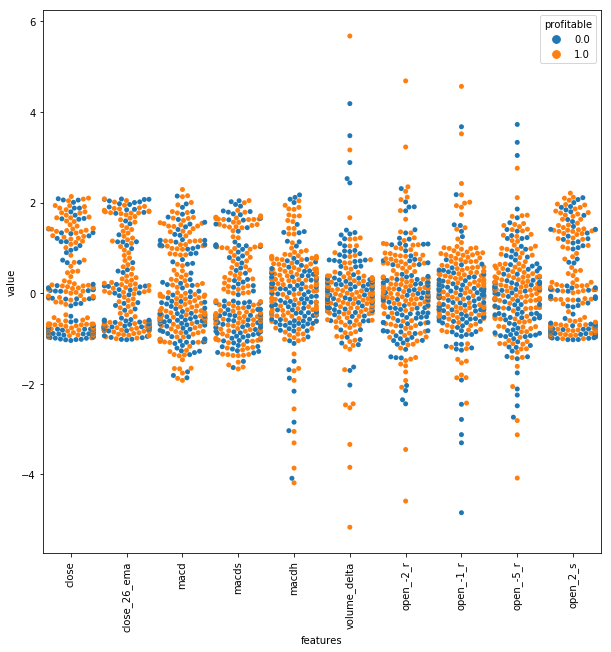

In [82]:
data = pd.melt(data_for_plot,id_vars="profitable",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="profitable", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

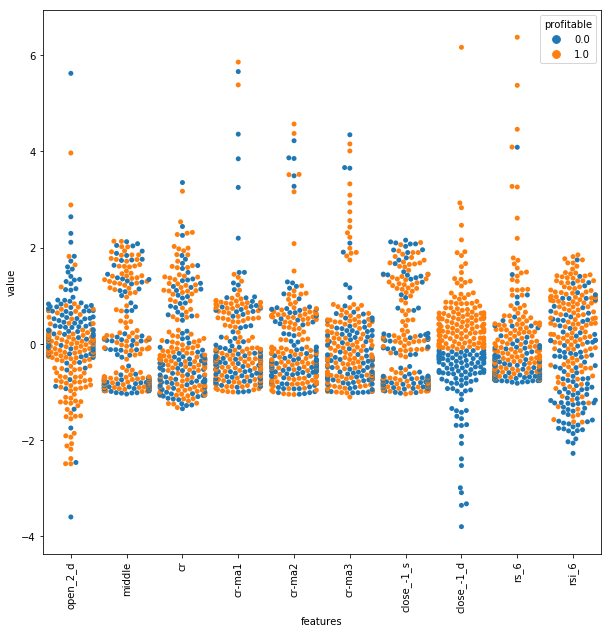

In [83]:
data_for_plot = pd.concat([y,x_std.iloc[:,10:20]],axis = 1)
data = pd.melt(data_for_plot,id_vars="profitable",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="profitable", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

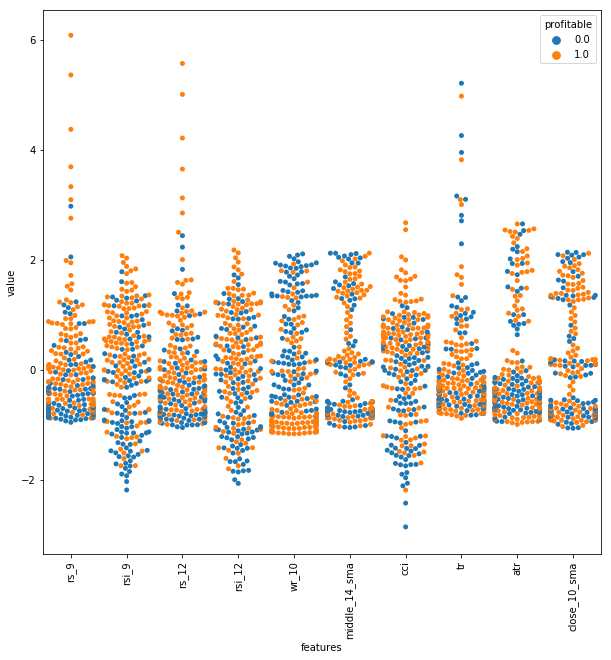

In [84]:
data_for_plot = pd.concat([y,x_std.iloc[:,20:30]],axis = 1)
data = pd.melt(data_for_plot,id_vars="profitable",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="profitable", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

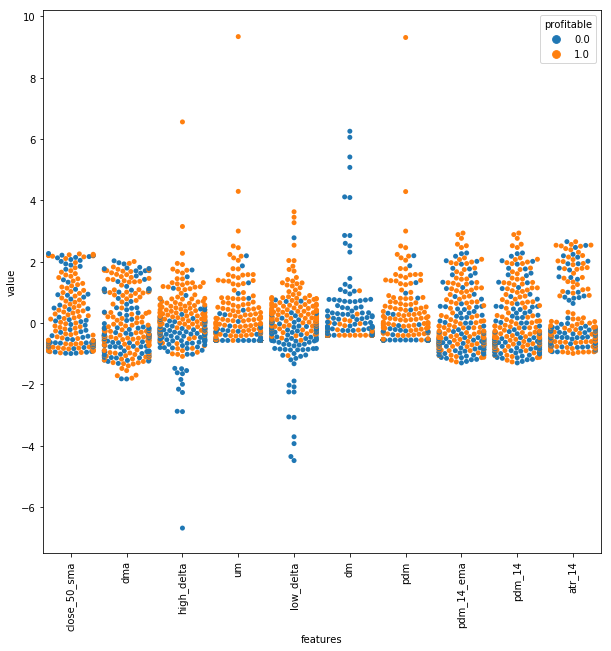

In [85]:
data_for_plot = pd.concat([y,x_std.iloc[:,30:40]],axis = 1)
data = pd.melt(data_for_plot,id_vars="profitable",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="profitable", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

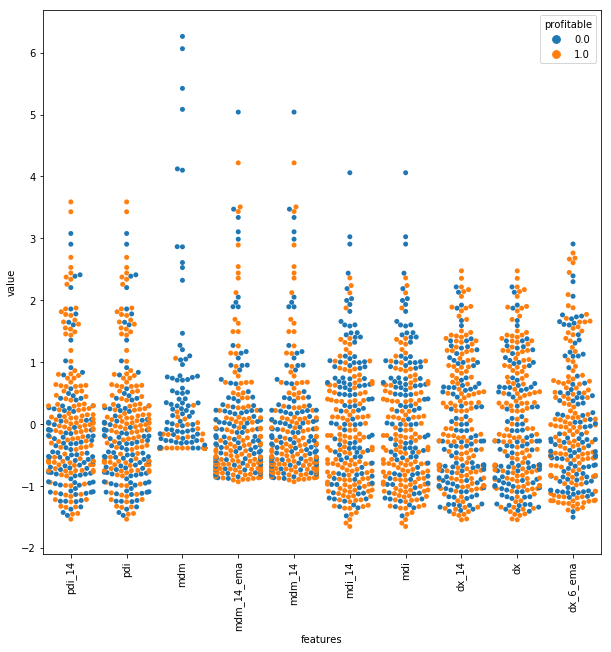

In [86]:
data_for_plot = pd.concat([y,x_std.iloc[:,40:50]],axis = 1)
data = pd.melt(data_for_plot,id_vars="profitable",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="profitable", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

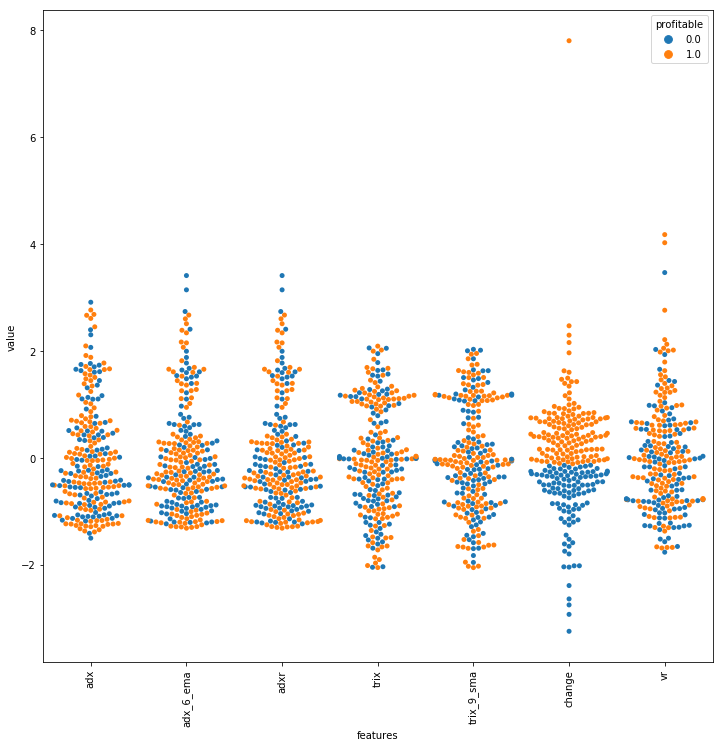

In [91]:
data_for_plot = pd.concat([y,x_std.iloc[:,50:60]],axis = 1)
data = pd.melt(data_for_plot,id_vars="profitable",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(12,12))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="profitable", data=data)
plt.xticks(rotation=90)

In [115]:
x_std

,close,close_26_ema,macd,macds,macdh,volume_delta,open_-2_r,open_-1_r,open_-5_r,open_2_s,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr
date,,,,,,,,,,,,,,,,,,,,,
2017-05-03,-1.013063,-1.028270,-0.592827,-0.708106,0.214867,-0.141693,0.632214,-0.170095,0.796997,-1.026333,...,1.376928,1.376928,2.909416,2.909416,3.408494,3.408494,-0.021061,-0.468095,-0.500270,3.464515
2017-05-04,-1.029816,-1.020999,-0.598512,-0.694772,0.156465,-0.607707,-0.267793,-0.207947,0.629709,-1.024274,...,0.977037,0.977037,2.393511,2.393511,3.141139,3.141139,-0.001700,-0.412558,-0.348976,2.025565
2017-05-05,-1.045995,-1.017670,-0.612961,-0.688303,0.090410,0.228856,-0.425620,-0.394603,-0.537218,-0.967538,...,0.091217,0.091217,1.700252,1.700252,2.735697,2.735697,-0.023789,-0.371957,-0.342131,1.028843
2017-05-08,-0.974723,-1.004886,-0.586738,-0.677240,0.141776,0.281426,-0.351907,-0.102758,0.100507,-0.964187,...,0.756474,0.756474,1.475809,1.475809,2.384634,2.384634,-0.026135,-0.284687,0.830433,1.513754
2017-05-09,-0.956630,-0.991921,-0.559490,-0.662474,0.185321,-0.083305,0.359120,0.615028,-0.112835,-1.004357,...,1.243031,1.243031,1.503077,1.503077,2.148559,2.148559,-0.015724,-0.200829,0.113111,1.976856
2017-05-10,-0.975154,-0.983446,-0.552195,-0.649389,0.169545,-0.608379,0.370818,-0.086347,-0.073172,-0.959399,...,0.279237,0.279237,1.160976,1.160976,1.875861,1.875861,-0.014017,-0.132216,-0.369512,1.357917
2017-05-11,-0.981520,-0.977053,-0.552845,-0.639339,0.137250,0.047019,-0.520464,-0.650206,-0.283056,-0.939146,...,-0.417811,-0.417811,0.659683,0.659683,1.527502,1.527502,-0.023874,-0.079169,-0.209925,0.873592
2017-05-12,-0.915800,-0.963829,-0.516243,-0.623315,0.207198,0.739292,-0.140791,0.457808,0.119719,-0.928278,...,0.495906,0.495906,0.644224,0.644224,1.276052,1.276052,-0.015055,-0.050358,0.743400,1.258471
2017-05-15,-0.931979,-0.954272,-0.501144,-0.607369,0.208000,0.330942,0.415507,0.132303,0.231840,-0.958441,...,0.517749,0.517749,0.641346,0.641346,1.096670,1.096670,-0.007753,-0.039516,-0.336771,0.524934


In [122]:
import random
RANDOM_STATE = 123
random.seed(RANDOM_STATE)
x_train,x_test,y_train,y_test = train_test_split(x_std[6:],y,test_size = .3,random_state = RANDOM_STATE)

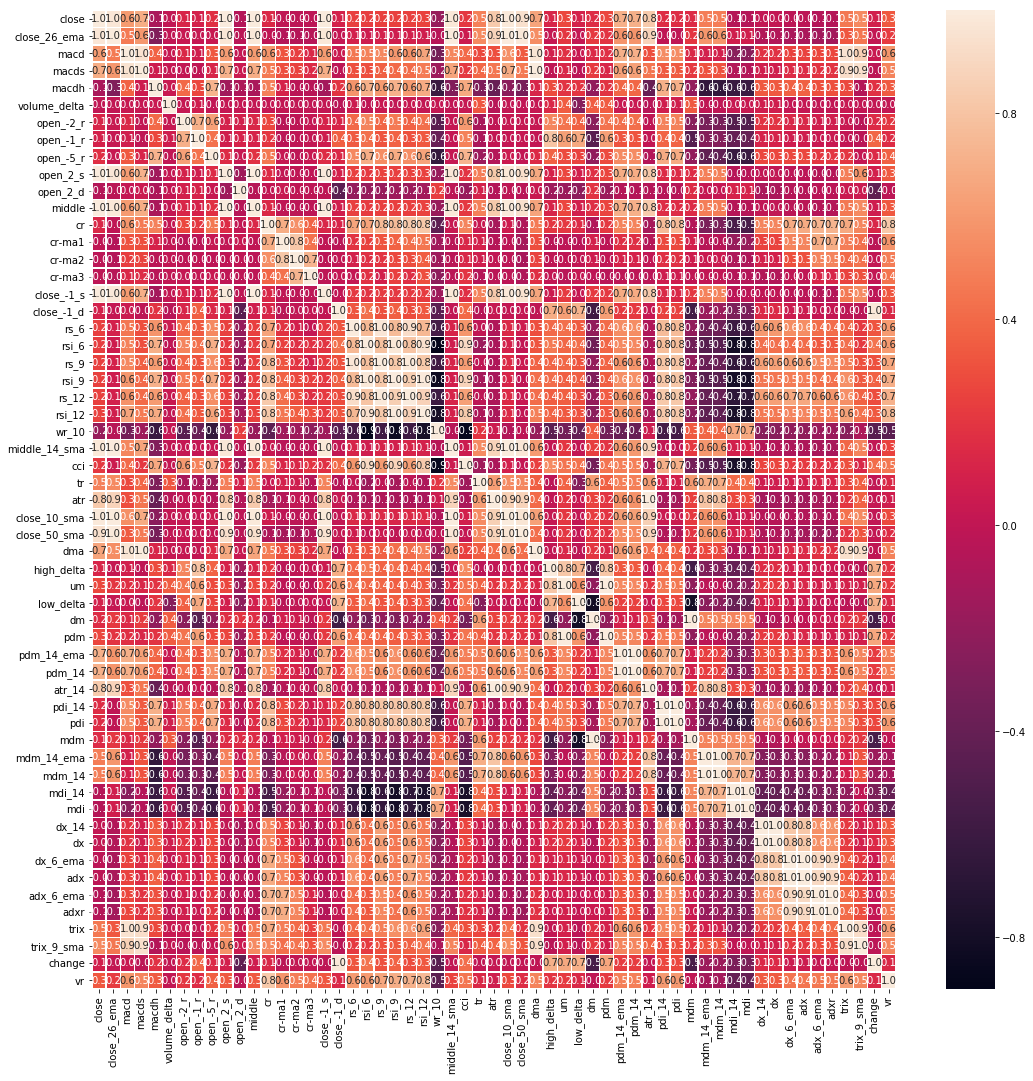

In [95]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy Score: 0.928571


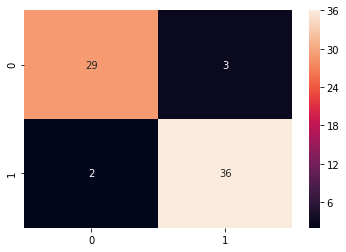

In [126]:
#x_train = x_train.drop("change", axis=1)
x_test = x_test.drop("change", axis=1)
clf_rf = RandomForestClassifier(random_state = RANDOM_STATE)
clr_rf = clf_rf.fit(x_train,y_train)

predictions = clf_rf.predict(x_test)

ac = accuracy_score(predictions,y_test)
cm = confusion_matrix(predictions,y_test)

print('Accuracy Score: %f' % ac)
sns.heatmap(cm,annot = True,fmt = 'd')

In [104]:
for x in range(0,60,10):
    print(x_train.iloc[:,x:x+10])

               close  close_26_ema      macd     macds     macdh  \
date                                                               
2017-12-01  0.046298      0.000250  0.870336  1.034691 -0.300766   
2018-03-08  1.910712      1.766328  1.554703  1.634269  0.105782   
2018-01-17  0.681236      0.487369  1.042045  0.666573  1.359246   
2017-06-30 -0.883970     -0.734695 -0.698620 -0.589405 -0.483095   
2017-10-20 -0.812602     -0.742122 -0.405423 -0.480897  0.136839   
2017-10-05 -0.822462     -0.827742 -0.873488 -1.036614  0.296373   
2018-02-22  1.592310      1.404231  1.472231  1.481515  0.298652   
2018-02-27  1.719824      1.530989  1.678957  1.611806  0.574157   
2017-10-30 -0.200209     -0.663285  0.169304 -0.383861  1.699552   
2018-02-23  1.662481      1.445284  1.542163  1.514876  0.424042   
2018-03-21  2.054308      2.069479  1.296945  1.618629 -0.678842   
2018-01-24  0.980444      0.673752  1.463904  1.128572  1.332215   
2018-02-13  1.253277      1.177060  1.038166  1.

[170 rows x 10 columns]
            open_2_d    middle        cr    cr-ma1    cr-ma2    cr-ma3  \
date                                                                     
2017-12-01  1.600232  0.060393  0.983043  0.714453  0.395289  0.276117   
2018-03-08 -1.232338  1.912489 -0.355611 -0.230563 -0.170247  0.262010   
2018-01-17  0.172307  0.693566  1.327046  0.045240 -0.405168 -0.479062   
2017-06-30  0.773970 -0.859138 -0.848409 -0.408721 -0.508518  0.133852   
2017-10-20  0.968732 -0.794442 -0.611051 -0.318917 -0.547171 -0.809186   
2017-10-05 -0.597559 -0.838474 -0.471486 -0.707016 -0.829331 -0.976881   
2018-02-22 -0.289350  1.611241 -0.078275 -0.154765  0.196143  0.819189   
2018-02-27  0.521829  1.742920  0.106639 -0.119458 -0.104276  0.619554   
2017-10-30 -0.176231 -0.206388  1.249063 -0.552942 -0.484936 -0.710387   
2018-02-23 -0.791665  1.647803  0.065209 -0.129960  0.088644  0.773515   
2018-03-21  1.719909  2.045304  0.755914 -0.157647 -0.368114 -0.322564   
2018-01-24 -0.

[170 rows x 10 columns]
                rs_9     rsi_9     rs_12    rsi_12     wr_10  middle_14_sma  \
date                                                                          
2017-12-01 -0.418293 -0.184410 -0.292103  0.022506  0.676941       0.080520   
2018-03-08  0.391243  0.870698  0.396363  0.806446 -1.064680       1.817574   
2018-01-17  1.019405  1.252989  1.162282  1.286226 -0.193023       0.478961   
2017-06-30 -0.792514 -1.324433 -0.848668 -1.256992  1.937640      -0.744233   
2017-10-20 -0.672998 -0.868033 -0.684345 -0.772335  1.893573      -0.732660   
2017-10-05 -0.219820  0.182697 -0.374816 -0.114510 -1.120282      -0.876037   
2018-02-22 -0.039930  0.438560  0.007783  0.427823 -0.913478       1.429089   
2018-02-27  0.061035  0.558968  0.118692  0.549596 -0.825323       1.527520   
2017-10-30  1.715163  1.511191  1.588142  1.466095 -0.919740      -0.653063   
2018-02-23  0.091677  0.592794  0.128304  0.559572 -1.115607       1.446150   
2018-03-21 -0.248079  0.1366

[170 rows x 10 columns]
            close_50_sma       dma  high_delta        um  low_delta        dm  \
date                                                                            
2017-12-01     -0.237290  1.062690   -0.077728 -0.482057  -0.471608  0.153601   
2018-03-08      1.610566  1.721438    0.353334  0.156004   0.928382 -0.399982   
2018-01-17      0.465752  0.609983   -1.552069 -0.569286  -0.627365  0.390258   
2017-06-30     -0.739262 -0.423831   -0.359828 -0.569286   0.000217 -0.399982   
2017-10-20     -0.720545 -0.377751    0.058138 -0.280946  -0.027109 -0.399982   
2017-10-05     -0.721379 -1.055853    0.611971  0.538841   0.602750 -0.399982   
2018-02-22      1.210965  1.342362   -0.188495 -0.569286  -0.251180 -0.181317   
2018-02-27      1.331009  1.774580    0.078327 -0.251063  -0.097700 -0.399982   
2017-10-30     -0.689475 -0.270194    0.802402  0.820719   1.851538 -0.399982   
2018-02-23      1.249336  1.486096   -0.275253 -0.569286   0.381867 -0.399982   
2018

[170 rows x 10 columns]
              pdi_14       pdi       mdm  mdm_14_ema    mdm_14    mdi_14  \
date                                                                       
2017-12-01  0.130807  0.130807  0.165058    0.164688  0.164688  0.685773   
2018-03-08 -0.257270 -0.257270 -0.388410    0.287007  0.287007 -0.252550   
2018-01-17  2.204759  2.204759  0.401666   -0.544341 -0.544341 -0.802361   
2017-06-30 -1.101109 -1.101109 -0.388410   -0.136374 -0.136374  0.299571   
2017-10-20 -0.101131 -0.101131 -0.388410   -0.543331 -0.543331 -0.179631   
2017-10-05 -0.203962 -0.203962 -0.388410   -0.534316 -0.534316 -0.195748   
2018-02-22 -0.133628 -0.133628 -0.169790    0.931143  0.931143 -0.010938   
2018-02-27 -0.096373 -0.096373 -0.388410    0.217218  0.217218 -0.527093   
2017-10-30  3.430002  3.430002 -0.388410   -0.611712 -0.611712 -1.040925   
2018-02-23 -0.307499 -0.307499 -0.388410    0.658421  0.658421 -0.185424   
2018-03-21 -0.186615 -0.186615 -0.388410    0.523550  0.523550  

[170 rows x 7 columns]


In [103]:
print(np.any(np.isnan(x_train)))
np.all(np.isfinite(x_train))

True


False

In [108]:
x_train = x_train.dropna()

In [109]:
print(np.any(np.isnan(x_train)))

False


In [110]:
x_train.isnull().values.any()

False